In [0]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Data from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
url = 'https://raw.githubusercontent.com/CyreMoonlord/ThinkfulStuffs/master/Video_Games_Sales_as_at_22_Dec_2016.csv'
videogame_db = pd.read_csv(url)

#Made columns lower case for coding consistency
videogame_db.columns = videogame_db.columns.str.lower()

#Data cleaning:
#Eliminated samples with global sales over 40 since they are very rare, makes charts easier to see at scale.
#Eliminated User Scores that are not values on a 1 to 10 scale, converted to float dtype for mathing ;)
sorting_bools = ((videogame_db['global_sales'] < 40) & (videogame_db['user_score'] != 'tbd'))
videogame_clean = videogame_db.iloc[sorting_bools.values]
videogame_clean.dropna(subset = ['user_score'], inplace=True)
videogame_clean['user_score'] = videogame_clean['user_score'].astype(float)

videogame_db.info()
videogame_clean.info()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
<class 'pan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
#General analysis:
videogame_clean.describe()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
count,7462.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7016.000000,7016.000000,7589.000000,7589.000000
mean,2007.687081,0.370415,0.221107,0.058603,0.078286,0.728590,70.249002,28.780074,7.124931,162.208855
std,4.296359,0.797536,0.569571,0.270658,0.240026,1.623832,13.881465,19.166650,1.500071,561.316313
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2004.000000,0.050000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.400000,10.000000
50%,2008.000000,0.140000,0.060000,0.000000,0.020000,0.280000,72.000000,24.000000,7.500000,24.000000
75%,2011.000000,0.370000,0.200000,0.010000,0.070000,0.720000,80.000000,39.000000,8.200000,81.000000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.700000,10665.000000


In [0]:
videogame_clean['global_sales'].describe()

count    7589.000000
mean        0.728590
std         1.623832
min         0.010000
25%         0.110000
50%         0.280000
75%         0.720000
max        35.520000
Name: global_sales, dtype: float64

In [0]:
print(videogame_clean['user_score'].describe())

count    7589.000000
mean        7.124931
std         1.500071
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


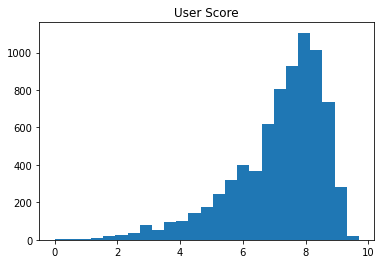

In [0]:
plt.hist(videogame_clean['user_score'], bins=25)
plt.title('User Score')
plt.show()

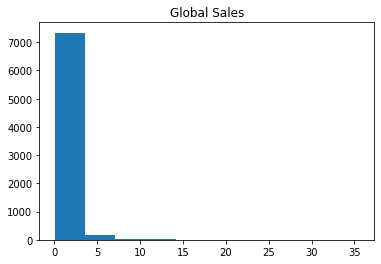

In [0]:
plt.hist(videogame_clean['global_sales'])
plt.title('Global Sales')
plt.show()

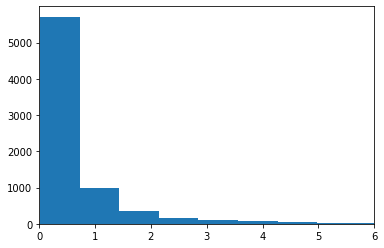

In [0]:
plt.hist(videogame_clean['global_sales'],bins=50)
plt.xlim(0, 6)
plt.show()

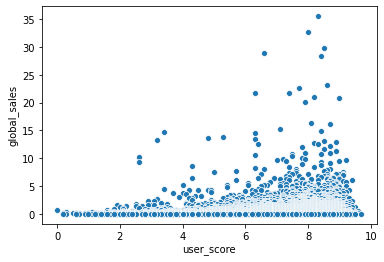

In [0]:
gsales_urating_scatter = sns.scatterplot(x=videogame_clean['user_score'], y=videogame_clean['global_sales'])


In [0]:
pd.crosstab(videogame_clean['user_score'], videogame_clean['global_sales'])

global_sales,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,9.90,10.12,10.25,10.50,10.60,10.70,10.81,10.95,11.01,11.35,11.66,12.12,12.13,12.61,12.63,12.66,12.84,13.10,13.32,13.47,13.67,13.79,14.61,14.73,14.98,15.29,16.15,16.27,20.15,20.81,21.04,21.79,21.81,22.70,23.21,28.32,28.92,29.80,32.77,35.52
user_score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.3,1,0,3,0,1,0,1,2,3,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.4,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.5,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


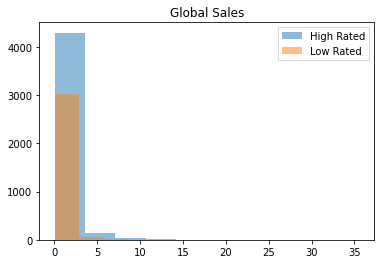

This difference in mean sales is $ 292502.1


Ttest_indResult(statistic=7.743408149067681, pvalue=1.093182644178466e-14)

In [0]:
#Dividing dataset into high and low rated games split at the mean user score.

user_score_mean = videogame_clean['user_score'].mean()

rated_high = (videogame_clean[videogame_clean['user_score'] > user_score_mean])
rated_low = (videogame_clean[videogame_clean['user_score'] <= user_score_mean])

plt.hist(rated_high['global_sales'], alpha = .5, label="High Rated")
plt.hist(rated_low['global_sales'], alpha = .5, label="Low Rated")
plt.legend()
plt.title("Global Sales")
plt.show()
mean_dif = round((((rated_high['global_sales'].mean())-(rated_low['global_sales'].mean()))*1000000), 2)
print("This difference in mean sales is $",mean_dif)
stats.ttest_ind(rated_high['global_sales'], rated_low['global_sales'])

There appears to be a significant difference in the global sales of games rated higher than average.

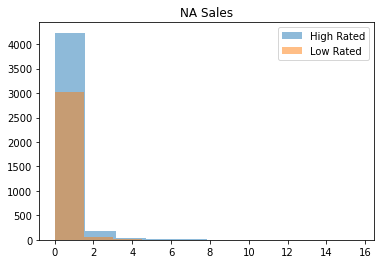

This difference in mean sales is $ 138494.64


Ttest_indResult(statistic=7.4628650260236284, pvalue=9.406596002678393e-14)

In [0]:
#Checking relation by regional market sales instead of global sales

plt.hist(rated_high['na_sales'], alpha = .5, label = "High Rated")
plt.hist(rated_low['na_sales'], alpha = .5, label = "Low Rated")
plt.title('NA Sales')
plt.legend()
plt.show()

mean_dif = round((((rated_high['na_sales'].mean())-(rated_low['na_sales'].mean()))*1000000), 2)
print("This difference in mean sales is $",mean_dif)
stats.ttest_ind(rated_high['na_sales'], rated_low['na_sales'])

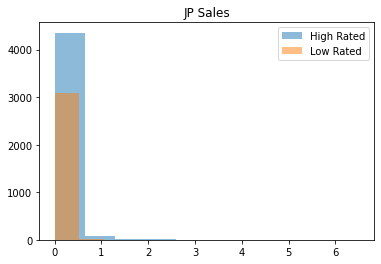

This difference in mean sales is $ 59317.46


Ttest_indResult(statistic=9.439137328844026, pvalue=4.900823972772665e-21)

In [0]:
plt.hist(rated_high['jp_sales'], alpha = .5, label = "High Rated")
plt.hist(rated_low['jp_sales'], alpha = .5, label = "Low Rated")
plt.title('JP Sales')
plt.legend()
plt.show()

mean_dif = round((((rated_high['jp_sales'].mean())-(rated_low['jp_sales'].mean()))*1000000), 2)
print("This difference in mean sales is $",mean_dif)
stats.ttest_ind(rated_high['jp_sales'], rated_low['jp_sales'])

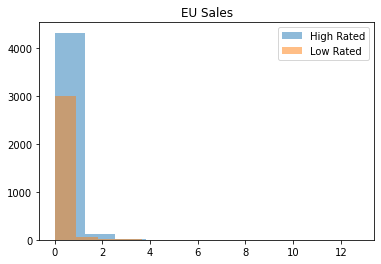

This difference in mean sales is $ 69025.32


Ttest_indResult(statistic=5.1983676387382145, pvalue=2.0629196743462297e-07)

In [0]:
plt.hist(rated_high['eu_sales'], alpha = .5, label = "High Rated")
plt.hist(rated_low['eu_sales'], alpha = .5, label = "Low Rated")
plt.title('EU Sales')
plt.legend()
plt.show()

mean_dif = round((((rated_high['eu_sales'].mean())-(rated_low['eu_sales'].mean()))*1000000), 2)
print("This difference in mean sales is $",mean_dif)
stats.ttest_ind(rated_high['eu_sales'], rated_low['eu_sales'])

The relationship appears to be consistent in all three major markets.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4963 entries, 2 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4963 non-null   object 
 1   platform         4963 non-null   object 
 2   year_of_release  4963 non-null   float64
 3   genre            4963 non-null   object 
 4   publisher        4963 non-null   object 
 5   na_sales         4963 non-null   float64
 6   eu_sales         4963 non-null   float64
 7   jp_sales         4963 non-null   float64
 8   other_sales      4963 non-null   float64
 9   global_sales     4963 non-null   float64
 10  critic_score     4699 non-null   float64
 11  critic_count     4699 non-null   float64
 12  user_score       4963 non-null   float64
 13  user_count       4963 non-null   float64
 14  developer        4959 non-null   object 
 15  rating           4946 non-null   object 
dtypes: float64(10), object(6)
memory usage: 659.1+ KB
<class 'p

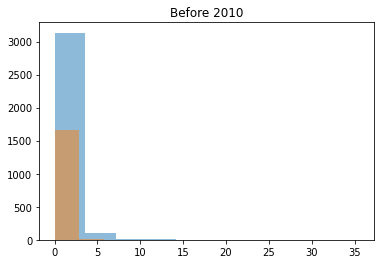

Ttest_indResult(statistic=7.910744064909862, pvalue=3.131058702873458e-15)


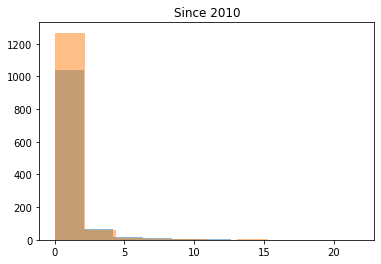

Ttest_indResult(statistic=2.890845798988393, pvalue=0.003875245133804216)


In [0]:
#Testing relation before and after 2010. Year picked for no particular reason other than the dataset was sufficiently sized in both cases
sorting_bool = (videogame_clean['year_of_release'] < 2010) 
vg_before10 = videogame_clean.iloc[sorting_bool.values]
vg_before10.dropna
vg_before10.info()

sorting_bool = (videogame_clean['year_of_release'] >= 2010) 
vg_since10 = videogame_clean.iloc[sorting_bool.values]
vg_since10.dropna
vg_since10.info()

rated_high = (vg_before10[vg_before10['user_score'] > user_score_mean])
rated_low = (vg_before10[vg_before10['user_score'] <= user_score_mean])

plt.hist(rated_high['global_sales'], alpha = .5)
plt.hist(rated_low['global_sales'], alpha = .5)
plt.title("Before 2010")
plt.show()

print(stats.ttest_ind(rated_high['global_sales'], rated_low['global_sales'])) 

rated_high = (vg_since10[vg_since10['user_score'] > user_score_mean])
rated_low = (vg_since10[vg_since10['user_score'] <= user_score_mean])

plt.hist(rated_high['global_sales'], alpha = .5)
plt.hist(rated_low['global_sales'], alpha = .5)
plt.title("Since 2010")
plt.show()

print(stats.ttest_ind(rated_high['global_sales'], rated_low['global_sales']))

The still appears to be a significant difference although the difference in these p-values may suggest some change.

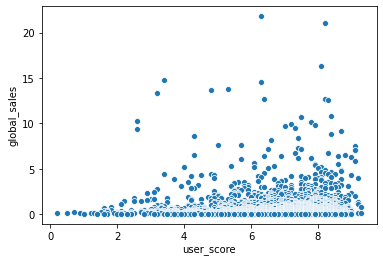

In [0]:
gsales_urating_since10_scatter = sns.scatterplot(x=vg_since10['user_score'], y=vg_since10['global_sales'])

['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


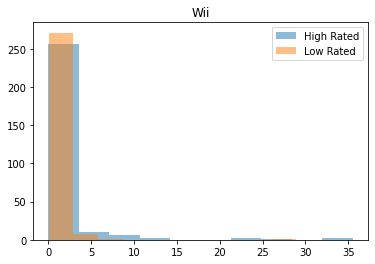

This difference in mean sales is $ 772997.06
Ttest_indResult(statistic=2.868921828163128, pvalue=0.00427495670805536)


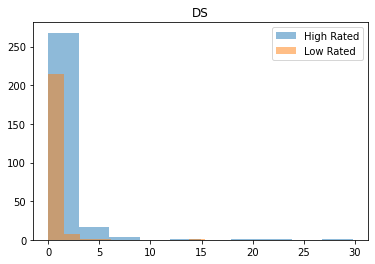

This difference in mean sales is $ 603838.26
Ttest_indResult(statistic=3.045964520263571, pvalue=0.0024384232394591434)


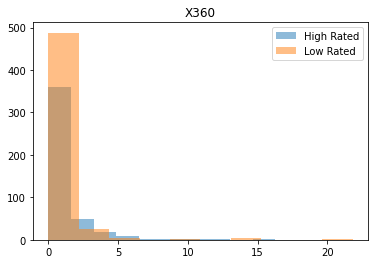

This difference in mean sales is $ 399216.69
Ttest_indResult(statistic=3.4932967333654177, pvalue=0.000498772801777636)


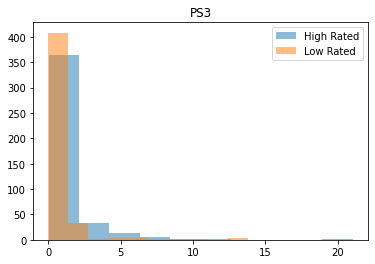

This difference in mean sales is $ 419315.57
Ttest_indResult(statistic=3.862830143620666, pvalue=0.00012034860788337712)


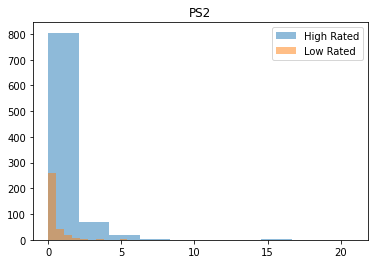

This difference in mean sales is $ 472780.2
Ttest_indResult(statistic=5.352830988399988, pvalue=1.0308844608349758e-07)


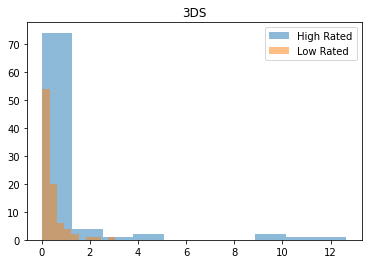

This difference in mean sales is $ 685606.08
Ttest_indResult(statistic=2.7560484520159116, pvalue=0.0064813181825078055)


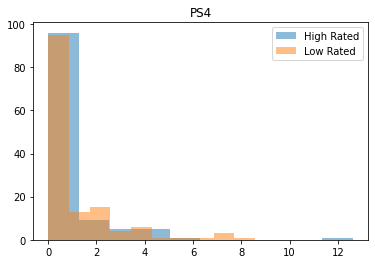

This difference in mean sales is $ -224017.7
Ttest_indResult(statistic=-1.0997444801035572, pvalue=0.2724806100718412)


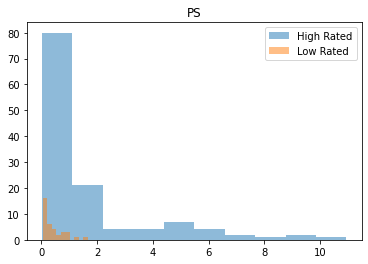

This difference in mean sales is $ 1180555.56
Ttest_indResult(statistic=3.175930008783199, pvalue=0.0017922548799197348)


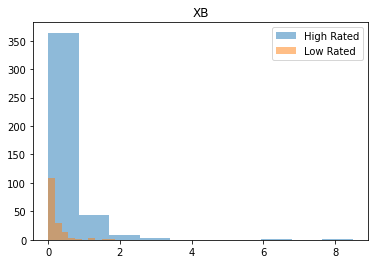

This difference in mean sales is $ 205599.51
Ttest_indResult(statistic=3.794449252686191, pvalue=0.00016340545192510296)


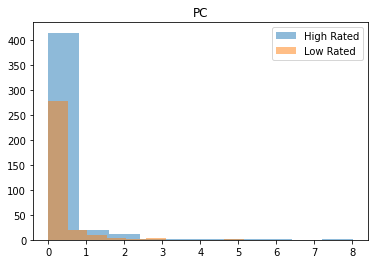

This difference in mean sales is $ 51113.17
Ttest_indResult(statistic=1.0481169005741346, pvalue=0.29491447812124794)


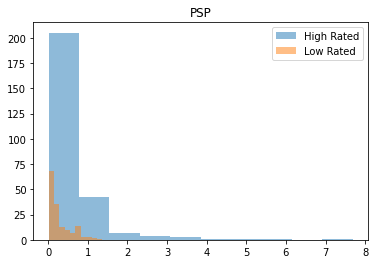

This difference in mean sales is $ 281104.98
Ttest_indResult(statistic=3.8783783447324476, pvalue=0.0001220630858694581)


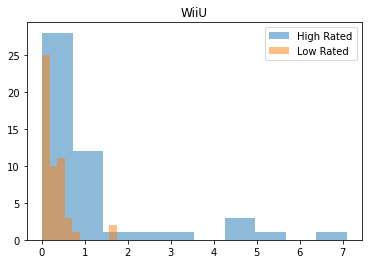

This difference in mean sales is $ 800432.69
Ttest_indResult(statistic=3.644881896857803, pvalue=0.00043028622478901937)


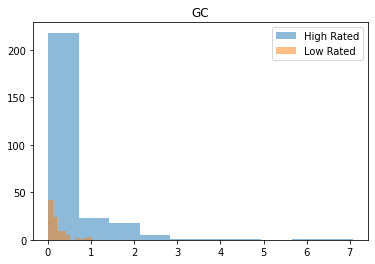

This difference in mean sales is $ 306414.75
Ttest_indResult(statistic=3.57559912305078, pvalue=0.00039656513535935576)


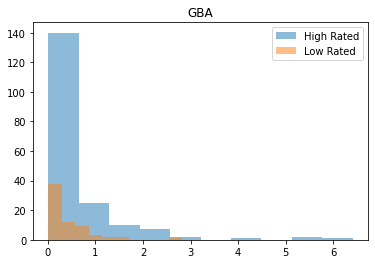

This difference in mean sales is $ 183577.33
Ttest_indResult(statistic=1.5415369072839253, pvalue=0.12443597427207063)


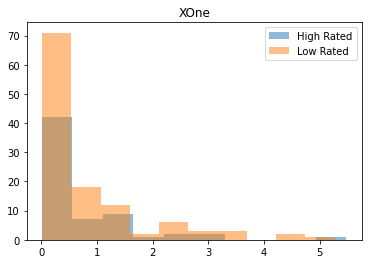

This difference in mean sales is $ -122293.43
Ttest_indResult(statistic=-0.773125271464225, pvalue=0.4404623204850562)


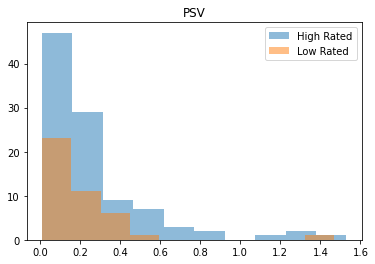

This difference in mean sales is $ 42491.75
Ttest_indResult(statistic=0.8526873595599603, pvalue=0.3952787922942308)


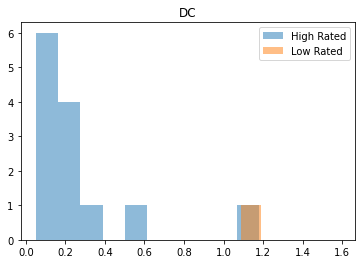

This difference in mean sales is $ -823846.15
Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
#Testing relation by Platform

platforms = videogame_clean.platform.unique()
print(platforms)

def high_low_checker(options, column):
  for option in options:
    sorting_bool = (videogame_clean[column] == option) 
    vg_by_option = videogame_clean.iloc[sorting_bool.values]
    vg_by_option.dropna
    
    rated_high = (vg_by_option[vg_by_option['user_score'] > user_score_mean])
    rated_low = (vg_by_option[vg_by_option['user_score'] <= user_score_mean])

    plt.hist(rated_high['global_sales'], alpha = .5, label="High Rated")
    plt.hist(rated_low['global_sales'], alpha = .5, label="Low Rated")
    plt.legend()
    plt.title(option)
    plt.show()

    mean_dif = round((((rated_high['global_sales'].mean())-(rated_low['global_sales'].mean()))*1000000), 2)
    print("This difference in mean sales is $",mean_dif)
    print(stats.ttest_ind(rated_high['global_sales'], rated_low['global_sales']));


high_low_checker(platforms, 'platform')


Some platforms may be more sensitive to the user rating. This could be accounted for by several factors, including platform bias, or platform exclusive titles. A more detailed look at each platform may be necessary. 

['E' 'M' 'T' 'E10+' 'K-A' nan 'AO' 'EC' 'RP']


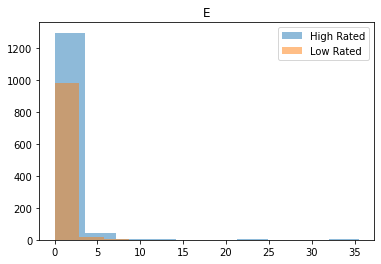

Ttest_indResult(statistic=3.9980032648727453, pvalue=6.58307870588445e-05)


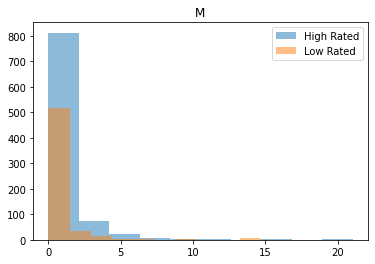

Ttest_indResult(statistic=2.2146858329473758, pvalue=0.026929870142199303)


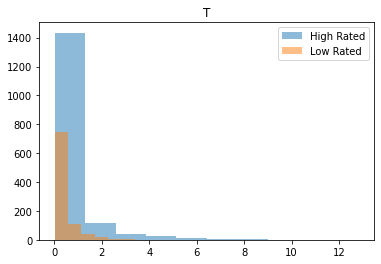

Ttest_indResult(statistic=7.040098438660566, pvalue=2.4578951998179043e-12)


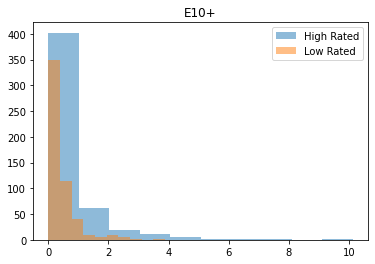

Ttest_indResult(statistic=5.757558876768778, pvalue=1.1222910193738693e-08)


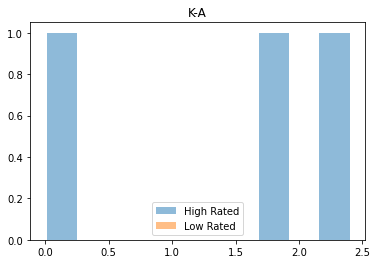

Ttest_indResult(statistic=nan, pvalue=nan)


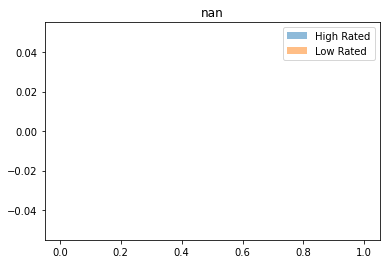

Ttest_indResult(statistic=nan, pvalue=nan)


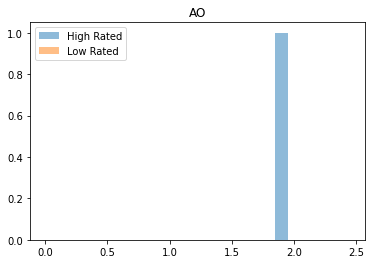

Ttest_indResult(statistic=nan, pvalue=nan)


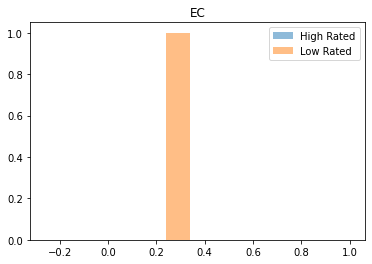

Ttest_indResult(statistic=nan, pvalue=nan)


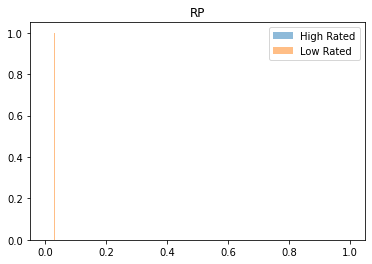

Ttest_indResult(statistic=nan, pvalue=nan)


In [0]:
#Testing relation by ESRB Rating

ratings = videogame_clean.rating.unique()
print(ratings)
   
high_low_checker(ratings, 'rating')

In [0]:
#Testing relation by Developer Rating (dropped due to nature of sample)
'''
developer = videogame_clean.developer.unique()
print(developer)
   
high_low_checker(developer, 'developer')
'''

"\ndeveloper = videogame_clean.developer.unique()\nprint(developer)\n   \nhigh_low_checker(developer, 'developer')\n"

The relation remains statisically significant for the most common rating. The p-value of M rating comapared to the others suggests less sesitivity to user rating for those games. This could be accounted for by several factors. For example, parents may consider user scores more heavily when buying games for their children (assuming these would tend to be non-M rated games)
A more detail exploration of each catagory, particularly M-rated would like yield more results.

Summary
---

The initial results indicate the user score has a significant relation to the global sales of a video game. The relation appears to be consistent across markets, ratings, and platforms, with some exceptions. A more detailed analysis of specific markets may be necessary. 
Follow up studies including this analysis repeated with critic scores and details of the factors the most effect the user scores of games are recommended.
